In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("../input/videogamesales/vgsales.csv")

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
print(f"Dataset rows: {df.shape[0]}")
print(f"Dataset columns: {df.shape[1]}")

Dataset rows: 16598
Dataset columns: 11


In [5]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [6]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

## Data Cleaning 

In [7]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

**Since 'Year' and 'Publisher' are important ones, we won't drop them.**

In [8]:
df.dropna(subset=['Year', 'Publisher'], inplace=True)

In [9]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [10]:
df.shape

(16291, 11)

In [11]:
# making 'Year' column integer type
integer_year = {'Year': 'int'}
df['Year'] = df['Year'].astype(integer_year)

In [12]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Total Sales per country

<AxesSubplot:title={'center':'Japan total sales'}, xlabel='Year', ylabel='Total Sales'>

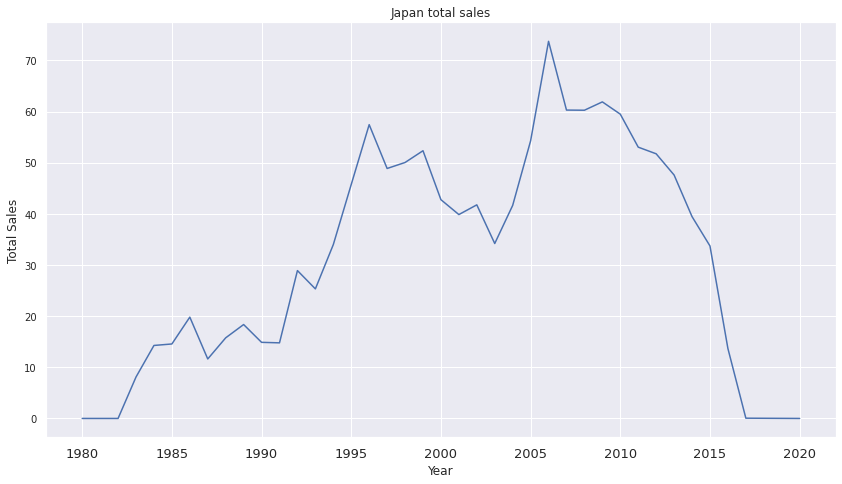

In [13]:
# Japan total sales per year
sns.set_theme(style='darkgrid')
japan_sales = df.groupby(by='Year')['JP_Sales'].sum()
plt.figure(figsize=(12, 7))
plt.title('Japan total sales')
plt.xlabel('Years')
plt.ylabel('Total Sales')
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=10)
plt.tight_layout()
japan_sales.plot()

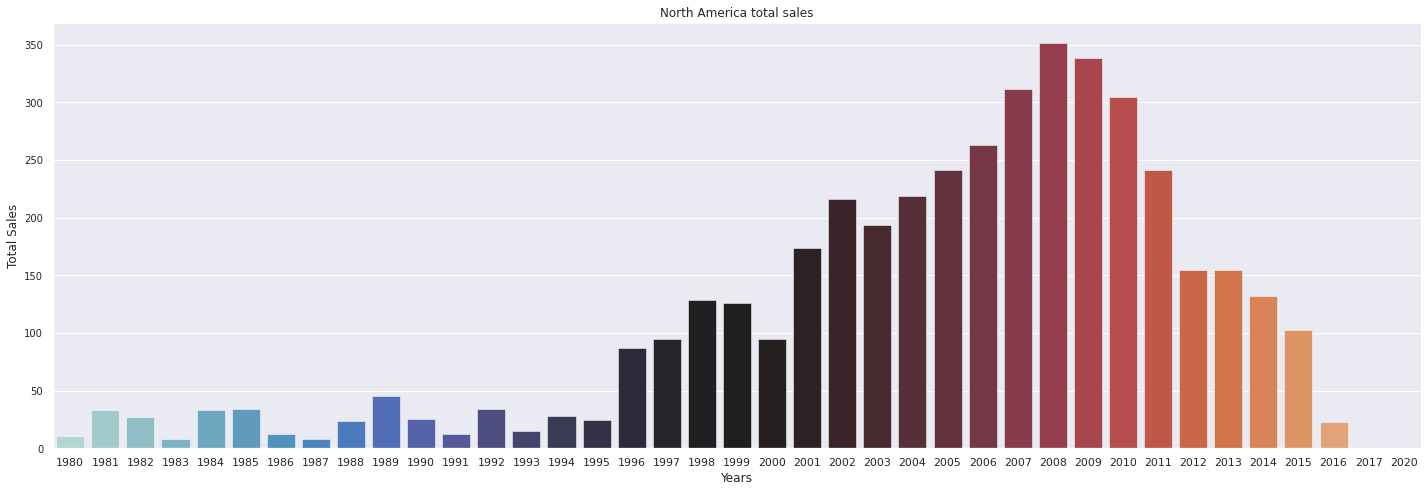

In [14]:
# Noth America Total sales per year
na_sales = df.groupby('Year')['NA_Sales'].sum()
plt.figure(figsize=(20, 7))

sns.barplot(
    x=na_sales.index, 
    y=na_sales.values,
    linewidth=0.5,
    palette='icefire'
)
plt.title('North America total sales')
plt.xlabel('Years')
plt.ylabel('Total Sales')
plt.yticks(fontsize=10)
plt.tight_layout()

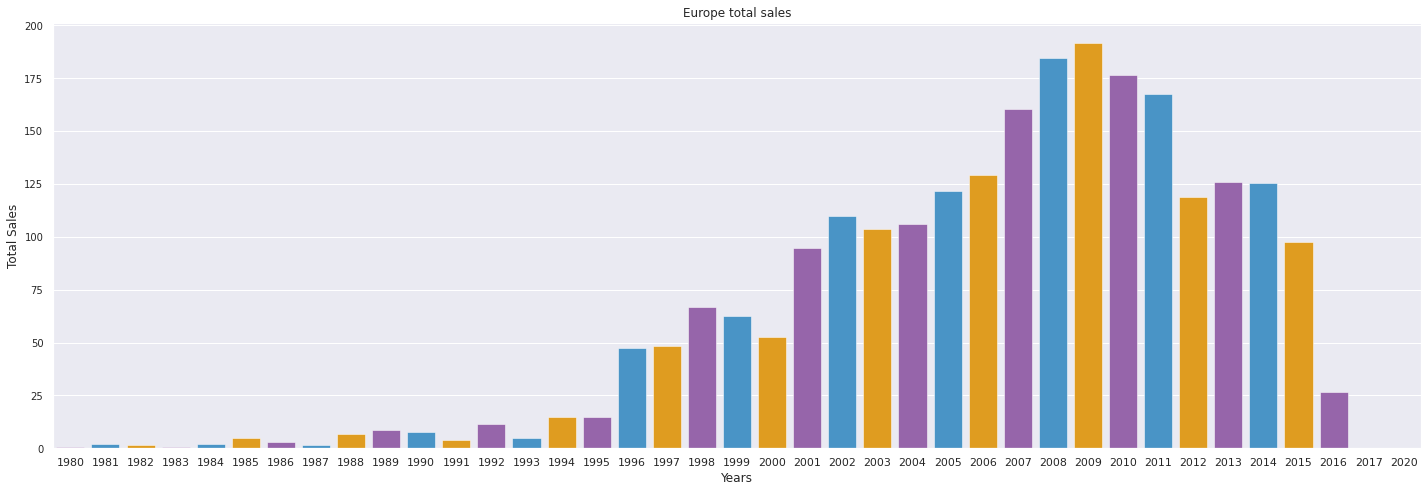

In [15]:
eu_sales = df.groupby('Year')['EU_Sales'].sum()
plt.figure(figsize=(20, 7))
flatui = ["#9b59b6", "#3498db", "orange"]

sns.barplot(
    x=eu_sales.index, 
    y=eu_sales.values,
    linewidth=0.5,
    palette=flatui
)
plt.title('Europe total sales')
plt.xlabel('Years')
plt.ylabel('Total Sales')
plt.yticks(fontsize=10)
plt.tight_layout()

## What game has sold the most?

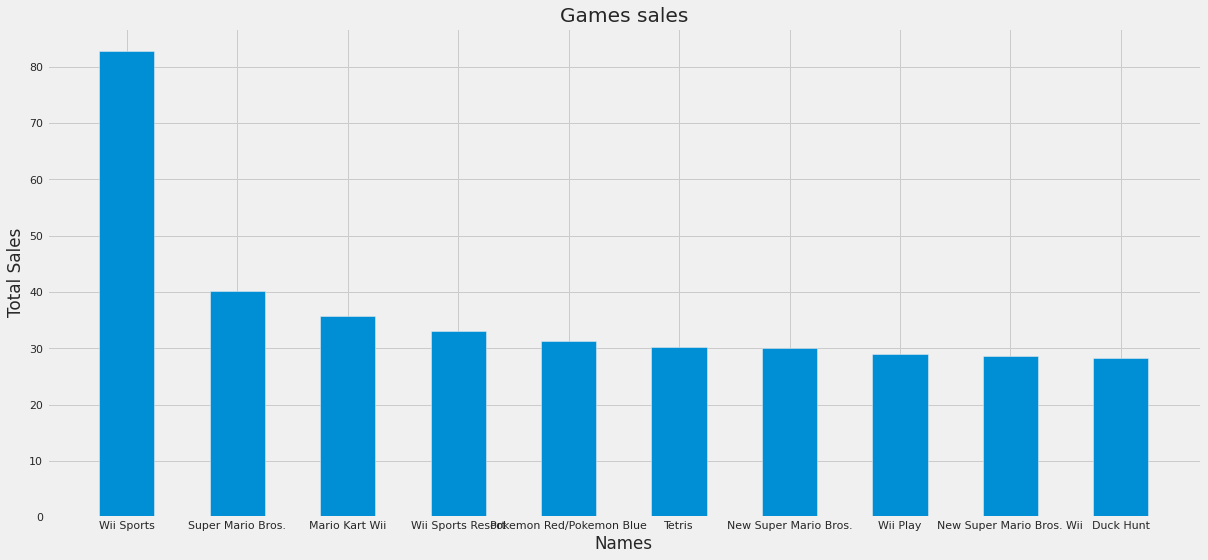

In [20]:
games_sold = df[df['Global_Sales']>25]
plt.style.use("fivethirtyeight")
plt.figure(figsize=(17, 8))
plt.bar(games_sold['Name'], games_sold['Global_Sales'], width=0.5)
plt.title('Games sales')
plt.xlabel('Names')
plt.ylabel('Total Sales')
plt.tight_layout()

# What genre has sold the most?

In [21]:
# genres 
games_sold.Genre.value_counts()

Platform        3
Sports          2
Racing          1
Role-Playing    1
Puzzle          1
Misc            1
Shooter         1
Name: Genre, dtype: int64

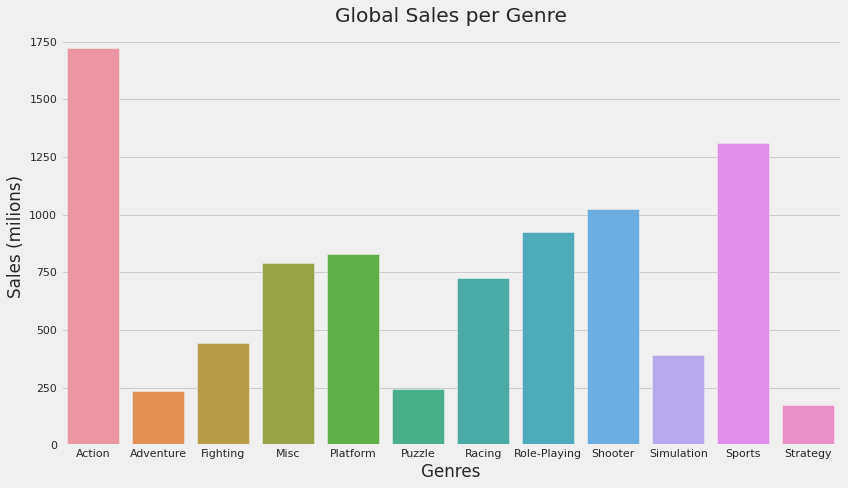

In [22]:
sales_per_genres = df.groupby('Genre').Global_Sales.sum()

plt.figure(figsize=(12, 7))

sns.barplot(
    x=sales_per_genres.index,
    y=sales_per_genres.values,
    )

plt.title('Global Sales per Genre')
plt.xlabel('Genres')
plt.ylabel('Sales (milions)')
plt.tight_layout()

# What publisher has the highest sale?

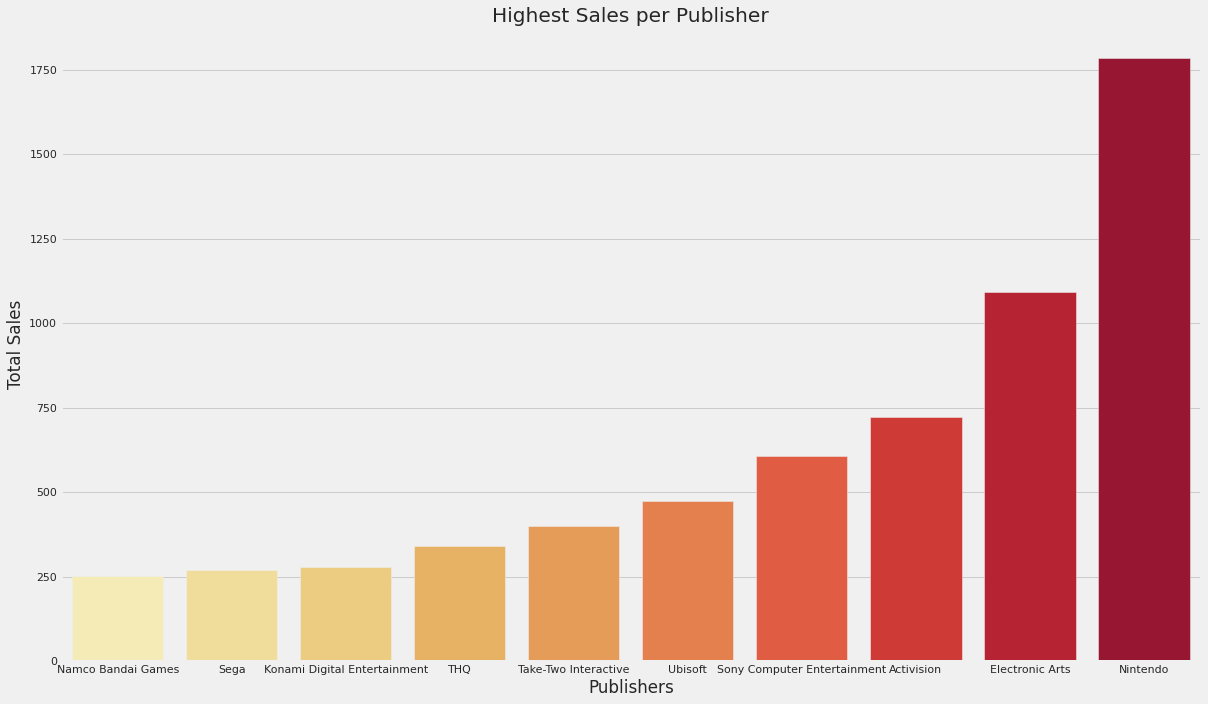

In [24]:
publisher_sale = df.groupby('Publisher').Global_Sales.sum().sort_values(ascending=True)

plt.figure(figsize=(17, 10))
sns.barplot(
    x=publisher_sale.iloc[-10:].index, 
    y=publisher_sale.iloc[-10:].values,
    palette='YlOrRd'
    )

plt.title('Highest Sales per Publisher')
plt.xlabel('Publishers')
plt.ylabel('Total Sales')
plt.tight_layout()

# Platform sales over the years - Wii, PS2, PS3, Xbox360

Text(0.5, 1.0, 'PS3 Sales over the years')

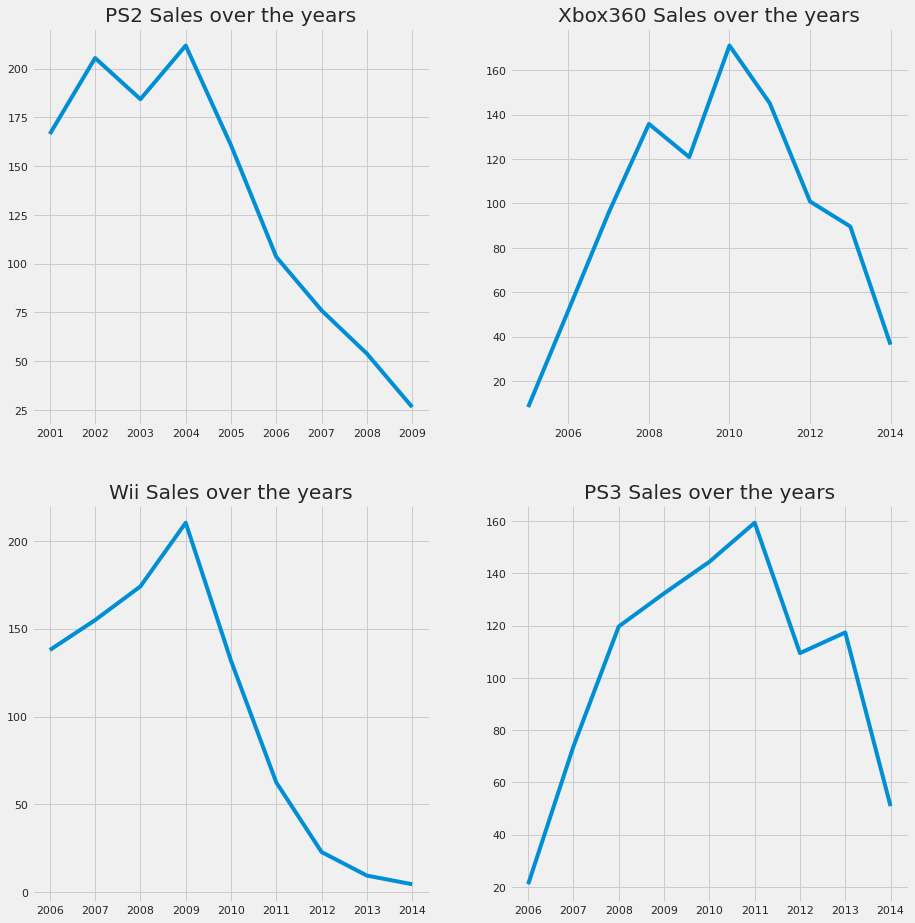

In [25]:
sales_ps2_year = df[(df['Platform'] == 'PS2') & (df['Year'] > 2000) & ((df['Year'] < 2010))]
sales_x360_year = df[(df['Platform'] == 'X360') & (df['Year'] > 2000) & ((df['Year'] < 2015))]
sales_wii_year = df[(df['Platform'] == 'Wii') & (df['Year'] > 2005) & ((df['Year'] < 2015))]
sales_ps3_year = df[(df['Platform'] == 'PS3') & (df['Year'] > 2005) & ((df['Year'] < 2015))]

fig, ax = plt.subplots(nrows= 2, ncols=2, figsize=(14, 15), sharex=False)
ax[0, 0].plot(sales_ps2_year.groupby('Year').Global_Sales.sum())
ax[0, 0].set_title('PS2 Sales over the years')

ax[0, 1].plot(sales_x360_year.groupby('Year').Global_Sales.sum())
ax[0, 1].set_title('Xbox360 Sales over the years')

ax[1, 0].plot(sales_wii_year.groupby('Year').Global_Sales.sum())
ax[1, 0].set_title('Wii Sales over the years')

ax[1, 1].plot(sales_ps3_year.groupby('Year').Global_Sales.sum())
ax[1, 1].set_title('PS3 Sales over the years')
